C:\Users\domanski\AppData\Local\Continuum\anaconda3\envs\said\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


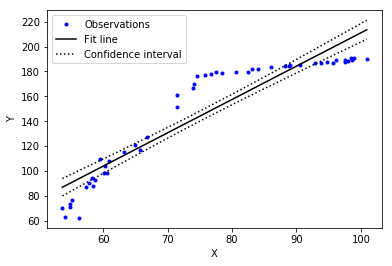

In [1]:
%matplotlib inline
from linearmodel.datamanager import DataManager
from linearmodel.model import CompoundLinearModel

X_dm = DataManager.read_tab_delimited_data(r'example data\Compound Linear\X.txt')
Y_dm = DataManager.read_tab_delimited_data(r'example data\Compound Linear\Y.txt')

dm = Y_dm.match_data(X_dm, time_window_width=15, match_method='nearest')

cl_model = CompoundLinearModel(dm, response_variable='Y', explanatory_variables=[['X']])
cl_model.plot()

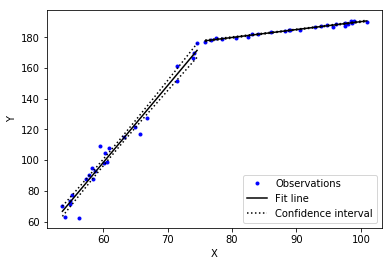

In [2]:
cl_model.set_break_points([75])
cl_model.plot()

In [3]:
cl_model.get_model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
Segment model range: -inf <= X < 75
========================
Linear regression model:
------------------------
 Y = -202.04 + 5.0084X  
==========================================================================
                 coef    std err          t      P>|t|  [90.0% Conf. Int.]
--------------------------------------------------------------------------
Intercept   -202.0386     11.426    -17.682   6.96e-15  -221.622  -182.455
X              5.0084      0.184     27.266   5.14e-19     4.694     5.323
                                     OLSRegression Results                                     
===============================================================================================
Number of observations                   25   R-squared                                 0.96999
Error degrees of freedom                 23   Adjusted R-squared                        0.96869
Root mean squared error              6.0486   F-statistic vs. constant model             743.44
Residual PPCC                       0.96097   p-value                                5.1379e-19
================================================
             High leverage:                0.24 
Extreme outlier (Standardized residual):    3   
       High influence (Cook's D)          2.2987
        High influence (DFFITS)          0.56569
===================================================================================================
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =
Segment model range: 75 <= X < inf
========================
Linear regression model:
------------------------
 Y = 138.58 + 0.51534X  
==========================================================================
                 coef    std err          t      P>|t|  [90.0% Conf. Int.]
--------------------------------------------------------------------------
Intercept    138.5750      1.659     83.507   4.58e-30   135.731   141.419
X              0.5153      0.018     27.990   2.86e-19     0.484     0.547
                                     OLSRegression Results                                     
===============================================================================================
Number of observations                   25   R-squared                                 0.97148
Error degrees of freedom                 23   Adjusted R-squared                        0.97024
Root mean squared error             0.72537   F-statistic vs. constant model             783.43
Residual PPCC                        0.9879   p-value                                2.8609e-19
================================================
             High leverage:                0.24 
Extreme outlier (Standardized residual):    3   
       High influence (Cook's D)          2.2987
        High influence (DFFITS)          0.56569
------------------------------------------------
"""

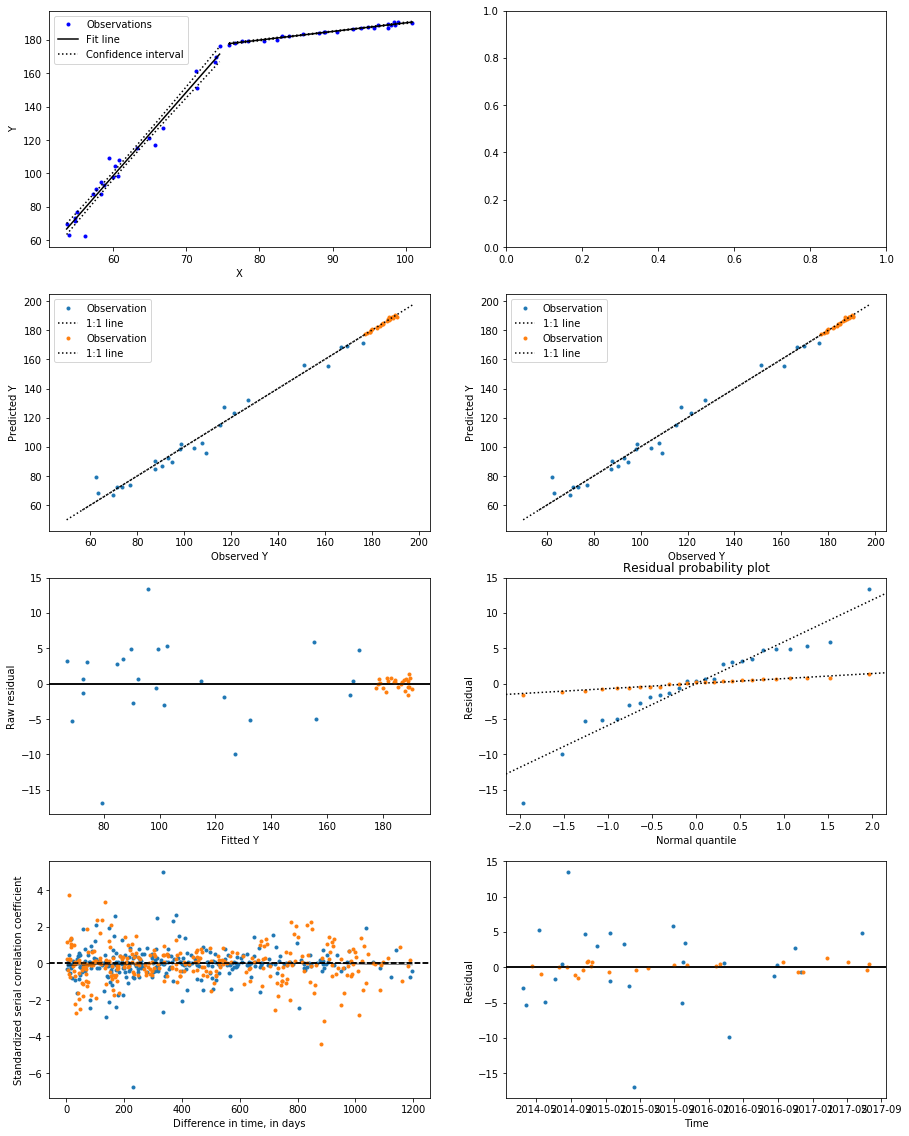

In [4]:
import matplotlib.pyplot as plt
fig, ((ax1, _), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
cl_model.plot(ax=ax1)
cl_model.plot('model_pred_vs_obs', ax=ax3)
cl_model.plot('pred_vs_obs', ax=ax4)
cl_model.plot('resid_vs_fitted', ax=ax5)
cl_model.plot('resid_probability', ax=ax6)
cl_model.plot('serial_correlation', ax=ax7)
cl_model.plot('resid_vs_time', ax=ax8)
fig.set_size_inches(15, 20)